# Text as Data HW2
### By-Vaidehi Thete (vvt221)

In [0]:
rm(list = ls())


In [0]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages("xtable")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
devtools::install_github("quanteda/quanteda.corpora")


✔  checking for file ‘/tmp/Rtmps199Iy/remotesa633073001/quanteda-quanteda.corpora-5933cc8/DESCRIPTION’
─  preparing ‘quanteda.corpora’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘quanteda.corpora/sources’
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘quanteda.corpora_0.87.tar.gz’ (3.4s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library(dplyr)
library(ggplot2)
library(xtable)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [0]:
install.packages("pbapply")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages("quanteda")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘coda’, ‘extrafontdb’, ‘Rttf2pt1’, ‘RcppEigen’, ‘statnet.common’, ‘reticulate’, ‘ISOcodes’, ‘data.table’, ‘extrafont’, ‘fastmatch’, ‘ggrepel’, ‘network’, ‘RSpectra’, ‘RcppParallel’, ‘sna’, ‘SnowballC’, ‘spacyr’, ‘stopwords’, ‘RcppArmadillo’



In [0]:
library("readtext")

In [0]:
install.packages("caret")

In [0]:
library("caret")

Loading required package: lattice


In [0]:
library(dplyr)
library(readtext)

In [0]:
library(quanteda)
library(quanteda.corpora)

library(dplyr)
library(e1071)
library(randomForest)
library(kernlab)
library(caret)
library(quanteda)
library(stringr)

# Part 1

**1. We would like you to perform some Naive Bayes classification by hand (that is, you may
use math functions or DFM-creating functions, but not any built-in naive Bayes functions).
Make sure to show your work!**

**(a) Imagine a situation in which you receive emails from the two main U.S. parties in anticipation
of the 2020 election. The contents of those emails after all relevant preprocessing
are displayed in Table 1. Using the standard Naive Bayes classifier without smoothing,
estimate for each party the posterior probability (or rather, the prior multiplied by
the likelihood) that the following email was sent by the respective party: “immigration
voter aliens help economy”. Report these estimates. Based on these results, which party
would you predict sent the mystery email? Explain whether you trust your findings and
why.**

**1. Develop a  corpus for democrats and republic emails**

In [0]:
republican_emails <- c("immigration aliens wall emergency country",
                       "voter economy president growth security",
                       "healthcare cost socialism unfair help")
                       
democratic_emails <- c("immigration country diversity help security",
                       "healthcare universal preconditions unfair help", "economy inequality opportunity voter help",
                       "abortion choice right women help"
                       )                       

**2. Generate a dfm for democratic and republican emails**

In [0]:
repub_dfm <- dfm(republican_emails)
demo_dfm <- dfm(democratic_emails)

**3. Create a likelihood for ords in democrat and republican emails**



 **Pr(tk |c) is the fraction of tokens in documents from class c that are t.**

In [0]:
# sum perform columnise sum to obtain count of a given word diveided by the total number of words

repub_likelihood <- colSums(repub_dfm) / sum(repub_dfm)

In [0]:
repub_likelihood

immigration      aliens        wall   emergency     country       voter 
 0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667 
    economy   president      growth    security  healthcare        cost 
 0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667 
  socialism      unfair        help 
 0.06666667  0.06666667  0.06666667

In [0]:
demo_likelihood <- colSums(demo_dfm) / sum(demo_dfm)

In [0]:
demo_likelihood

immigration       country     diversity          help      security 
         0.05          0.05          0.05          0.20          0.05 
   healthcare     universal preconditions        unfair       economy 
         0.05          0.05          0.05          0.05          0.05 
   inequality   opportunity         voter      abortion        choice 
         0.05          0.05          0.05          0.05          0.05 
        right         women 
         0.05          0.05

**4. Initializing the prior probabilities based on the number of emails belonging to each class**

In [0]:
prior_repub <- 3/7
prior_democrat <- 4/7

demo_posterior_prob <- 1.0
repub_posterior_prob <- 1.0

**5. Peform Naive Bayes computation by iterating through each word in the test sentence by computing the overall likelihood (if the term is already present in the vocabulary of the classes) and then multiplying it with the prior to obtain the posterior probability**

In [0]:
repub_likehood_total <- 1.0
demo_likehood_total <- 1.0
for (word in list("immigration","aliens","voter","aliens","help","economy")) {
  
  #calculate posterior probability for republicans and democrats:
 
  
  
  if (word %in% as.list(featnames(repub_dfm))) {
  
  repub_likehood_total = repub_likehood_total * as.matrix(repub_likelihood[word])[1]
    
  }
  
  else {
  
  next
  }
  
  
  if (word %in% as.list(featnames(demo_dfm))) {
  demo_likehood_total = demo_likehood_total * as.matrix(demo_likelihood[word])[1]
    
  }
  
  else {
  
  next
  }
  
  
}
demo_posterior_prob <- demo_likehood_total * prior_democrat
repub_posterior_prob <- repub_likehood_total * prior_repub
print("democrat posterior probability")
print(demo_posterior_prob)
print("republican posterior probability")
print(repub_posterior_prob)
print("Classification Output")
if(demo_posterior_prob > repub_posterior_prob) {
  print("Democrat")
}else {
  
  print("Republic")
}

[1] "democrat posterior probability"
[1] 1.428571e-05
[1] "republican posterior probability"
[1] 3.762493e-08
[1] "Classification Output"
[1] "Democrat"


** Report these estimates. Based on these results, which party
would you predict sent the mystery email? Explain whether you trust your findings and
why.**




**Answer:  Based on the estimates computed it appears that the email was sent by a democrat.This is because the features in the test sentence are more likely to appear in the democrat email. **

**(b) Now impose Laplace smoothing on the problem and re-estimate each party’s respective
posterior probability. Report your findings. Based on these new results, which party
would you predict sent the mystery email? Beyond computational reasons (i.e. avoiding
log(0)’s), can you think of any theoretical reason why smoothing might make sense (hint:
the above data is but a sample of each party’s shared language)**



**Answer: In Naive Bayes classifier, the products of probabilities of the features is evaluated during the training of the model and we clearly don't want it to evaluate to zero. So to get rid of this, we have to assign some non-zero probabilities to the words(features) which do not occur in the particular training dataset. This is what Laplace smoothing does.**

Laplace smoothing, equivalent to a uniform prior on term (each term
occurs once for each class)

So may want to add one to each count:P
Tct+1
t
0∈V
(Tct0+1)
to avoid wiping out
the products 

**1. Construct dfm for democrat and republican emails**

In [0]:
dfm_laplace_repub <- dfm(republican_emails)
dfm_laplace_demo <- dfm(democratic_emails)

**2. Compute the likelihood of each token after enabling Laplace Smoothing after adding one to total count of each word . And adding the length of vocabulary to the total count pf words in the corpus of each class**




So may want to add one to each count:P
Tct+1
t
0∈V
(Tct0+1)
to avoid wiping out
the products (or causing problems for taking logs). Equivalent to
adding size of the vocabulary to the counts within the class

In [0]:
demo_likelihood <- (colSums(dfm_laplace_demo) + 1) / (sum(dfm_laplace_demo) + length(featnames(dfm_laplace_demo)))

In [0]:
repub_likelihood <- (colSums(dfm_laplace_repub) + 1) / (sum(dfm_laplace_repub) + length(featnames(dfm_laplace_repub)))


In [0]:
colSums(dfm_laplacian_repub) + 1

immigration      aliens        wall   emergency     country       voter 
          2           2           2           2           2           2 
    economy   president      growth    security  healthcare        cost 
          2           2           2           2           2           2 
  socialism      unfair        help 
          2           2           2

In [0]:
repub_likehood_total <- 1.0
demo_likehood_total <- 1.0


demo_posterior_prob <- 1.0
repub_posterior_prob <- 1.0
for (word in list("immigration","aliens","voter","aliens","help","economy")) {
  
  #calculate posterior probability for republicans and democrats:
 
  
  
  if (word %in% as.list(featnames(dfm_laplace_repub))) {
  
  repub_likehood_total = repub_likehood_total * 1 * as.matrix(repub_likelihood[word])[1]
    
  }
  
  else {
  
  repub_likehood_total = repub_likehood_total * 1 / (length(featnames(dfm_laplace_repub)) + sum(dfm_laplace_repub))
  }
  
  
  if (word %in% as.list(featnames(dfm_laplace_demo))) {
  demo_likehood_total = demo_likehood_total * as.matrix(demo_likelihood[word])[1]
    
  }
  
  else {
  
  demo_likehood_total = demo_likehood_total *( 1 / (length(featnames(dfm_laplace_demo))*2) + sum(dfm_laplace_demo))
  }
  
  
}
demo_posterior_prob <- demo_likehood_total * prior_democrat
repub_posterior_prob <- repub_likehood_total * prior_repub
print("Democrat Posterior Probability")
print(demo_posterior_prob)
print("Republican Posterior Probability")
print(repub_posterior_prob)
print("Classification Output")
if(demo_posterior_prob > repub_posterior_prob) {
  print("Democrat")
}else {
  
  print("Republic")
}

[1] "Democrat Posterior Probability"
[1] 0.004892732
[1] "Republican Posterior Probability"
[1] 3.762493e-08
[1] "Classification Output"
[1] "Democrat"


# Part 2

**For this exercise you will use a database of Yelp reviews gathered for a Kaggle challenge
(source). Each user left a star rating of 1-5 along with a written review. You’ll be asked to
use some of the supervised learning techniques we’ve discussed in class to analyze these texts.
Download the most recent version from the course GitHub. The data are available in the file
“yelp .csv”.
Before we get started, be sure to actually read a few of the reviews, to get a feel for the language used, and any potential imperfections in the text created during the scraping process.
For each task (3) through (6), begin with the raw version of the text, and briefly
explain which pre-processing steps are appropriate for that particular task.**

**Q2. Before we apply any classification algorithms to the Yelp reviews, we will need a general
classifier that tells us whether the review was positive or negative—also referred to as the
“actual score.”**

**1. Read in the yelp.csv file**

In [0]:
yelp_reviews <- read.csv("yelp.csv")

**(a) Divide the reviews at the empirical median score and assign each review a label as
being “positive”—if the user score was greater than the empirical median score—or
“negative”—if the review is less than or equal to the empirical median (you can use “1”
and “0” as labels if you prefer, just be consistent as you do the exercises below).**

**1.The empirical median of the stars obtained herre is 4 stars**

In [0]:
median(yelp_reviews$stars)

[1] 4

**2.assign each review a label as being “positive”—if the user score was greater than the empirical median score—or “negative”—if the review is less than or equal to the empirical median**

In [0]:
yelp_reviews$sentiment <- ifelse(yelp_reviews$stars>median(yelp_reviews$stars),"Positive","Negative")

**(b) For some tasks, we will need “anchor” texts at the extreme of the distribution. Create
a character variable (name it “anchor”) that has value “positive” if the user star rating
given to a review is equal to 5, “neutral” if the user rating is less than 5 but greater
than 1 and finally “negative” if the user rating is equal to 1. Report the proportion of
reviews that are anchor positive, neutral and negative.**

In [0]:
yelp_reviews$anchor <- NA
yelp_reviews$anchor[yelp_reviews$stars == 5] <- "Positive"
yelp_reviews$anchor[(yelp_reviews$stars < 5) &(yelp_reviews$stars > 1)] <- "Neutral"
yelp_reviews$anchor[yelp_reviews$stars == 1] <- "Negative"

**1.Report the proportion of
reviews that are anchor positive, neutral and negative**

**a. Proportion of anchor positive texts**

In [0]:
nrow(yelp_reviews[yelp_reviews$anchor == 'Positive',]) / nrow(yelp_reviews)

[1] 0.3337

**b. Proportion of anchor negative texts.**

In [0]:
nrow(yelp_reviews[yelp_reviews$anchor == 'Negative',]) / nrow(yelp_reviews)

[1] 0.0749

**c. Proportion of anchor neutral texts.**

In [0]:
nrow(yelp_reviews[yelp_reviews$anchor == 'Neutral',]) / nrow(yelp_reviews)

[1] 0.5914

**3. The first method we’ll use to classify reviews as being positive or negative will be dictionary
based. To do so, you will use the dictionaries of positive and negative words discussed in Hu
2
& Liu (2004)—available on GitHub. You must use the dictionaries provided and may not use
any substitutes from R packages**

### Preprocessing Steps:

1. Load the list of positive and negative words from the word lists provided

In [0]:

positive_words <- scan("positive-words.txt", what="", sep="\n")
negative_words <- scan("negative-words.txt", what="", sep="\n")

In [0]:
positive_words[0:5]

[1] "a+"        "abound"    "abounds"   "abundance" "abundant"

In [0]:
negative_words[0:5]

[1] "2-faced"    "2-faces"    "abnormal"   "abolish"    "abominable"

**(a) First, generate a sentiment score for each review based on the number of positive words
minus the number of negative words. Then, create a vector of dichotomous variables,
of equal length to the number of reviews, in which texts that have a positive sentiment
score are labeled “positive,” while those with a negative score are labeled “negative”; if
any of them have a sentiment score of 0, score them as positive. Report the percent of
reviews in each category, and discuss the results.**

### Preprocessing Step:

1. Create a dfm for the reviews, one dfm consisting of features based on the positive-words.txt and the other dfm of the yelp revies is based on the features found in the negative-words.txt

**Escape special characters in the negative word list**

In [0]:
quotemeta <- function(string) {
  #str_replace_all(string, "(\\W)", "\\\\\\1")
  string = gsub("([\\])","", string)
}

In [0]:
negative_escaped <- quotemeta(negative_words)

In [0]:
yelp_dfm_pos <- dfm(as.character(yelp_reviews$text),select = positive_words)
#

In [0]:
yelp_dfm_neg <- dfm(as.character(yelp_reviews$text),select = negative_escaped)

### Preprocessing Step:

2. Calculate the row sum of each dfm to obtain the frequency of the total number of postitive and negative word features from the two lists.



In [0]:
overall_positive_score <- rowSums(yelp_dfm_pos)
overall_negative_score <- rowSums(yelp_dfm_neg)

### Preprocessing Step:

3. Take the difference of the postive and the negative word sums to obtain the overall sentiment score for each document and add it as a column to the yelp_reviews table.

In [0]:
overall_sentiment_score <- (overall_positive_score - overall_negative_score)

In [0]:
yelp_reviews$overall_sentiment_score <- overall_sentiment_score

### Preprocessing Step:

4. Create a vector of dichotomous variables,
of equal length to the number of reviews, in which texts that have a positive sentiment
score are labeled “positive,” while those with a negative score are labeled “negative”; if
any of them have a sentiment score of 0, score them as positive.

In [0]:
yelp_reviews$overall_sentiment_categorical[yelp_reviews$overall_sentiment_score >=0] <- "Positive"
yelp_reviews$overall_sentiment_categorical[yelp_reviews$overall_sentiment_score <0] <- "Negative"



### Preprocessing Step:

5.  Report the percent of
reviews in each category, and discuss the results.

In [0]:
nrow(yelp_reviews[yelp_reviews$overall_sentiment_categorical == "Positive",]) / nrow(yelp_reviews)

[1] 0.9041

In [0]:
nrow(yelp_reviews[yelp_reviews$overall_sentiment_categorical == "Negative",]) / nrow(yelp_reviews)

[1] 0.0959

#### Discussion:
Based on the proportion of the reviews classified based on the  Hu & Liu approach it appears that most of the reviews in the yelp data set is positive and the negative texts are relatively lesser in comparision.

**(b) Create a histogram to visualize the distribution of the continuous sentiment measure.
Your answer should be a graph.**

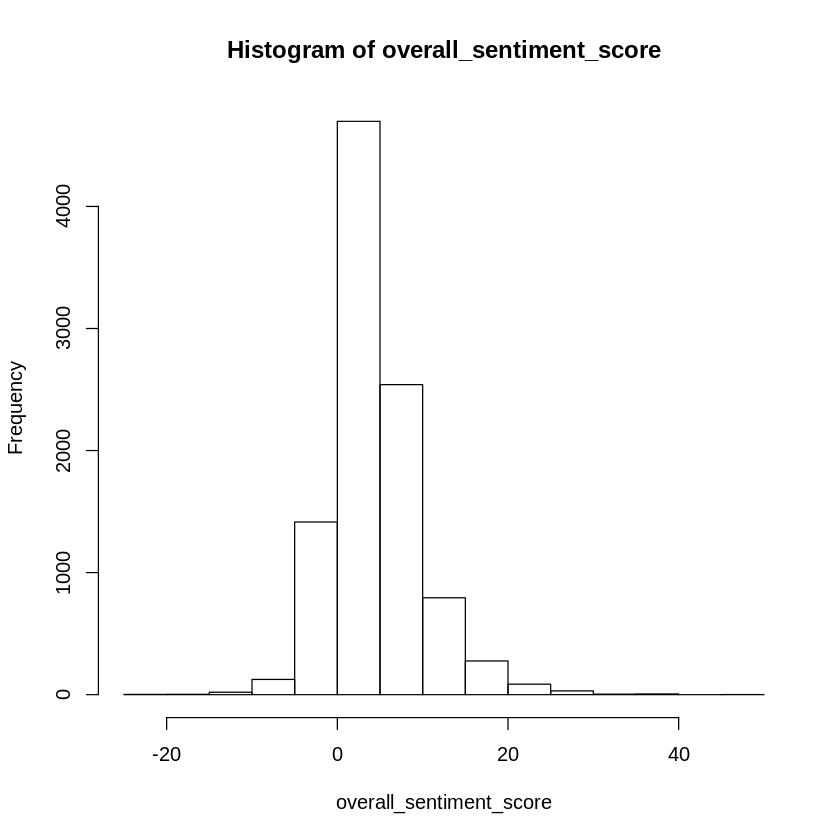

In [0]:
hist(overall_sentiment_score)

**Interpretation:**

The histogram of the continous sentiment score that most of the scores are in the range 0-5 and the positive scores have a higher frequency than the reviews which has a negative score as echoed by the proportions calculated in part 3(a).

**(c) Evaluate the performance of your model at identifying positive or negative reviews by
creating a confusion matrix with the positive and negative values assigned by the sentiment
score (created in 3(a)) on the vertical axis and the binary “true” classifications
(created in 2(a)) on the horizontal axis. Use this confusion matrix to compute the accuracy,
precision, recall and F1 score of the sentiment classifier. Report these findings
along with the confusion matrix. In terms of accuracy, how would you evaluate the
performance of this classifier? (Hint: is there a baseline we can compare it to?)**

**1.  Creating a confusion matrix with the positive and negative values assigned by the sentiment score (created in 3(a)) on the vertical axis and the binary “true” classifications (created in 2(a)) on the horizontal axis.**

In [0]:
cmat_sentiment_classify <- table(yelp_reviews$sentiment, yelp_reviews$overall_sentiment_categorical)

In [0]:
print(cmat_sentiment_classify)

          
           Negative Positive
  Negative      867     5796
  Positive       92     3245


**2. Compute the accuracy, precision, recall and F1 score of the sentiment classifier**

In [0]:
nb_acc_sm <- sum(diag(cmat_sentiment_classify))/sum(cmat_sentiment_classify) # accuracy = (TP + TN) / (TP + FP + TN + FN)
nb_recall_sm <- cmat_sentiment_classify[2,2]/sum(cmat_sentiment_classify[2,]) # recall = TP / (TP + FN)
nb_precision_sm <- cmat_sentiment_classify[2,2]/sum(cmat_sentiment_classify[,2]) # precision = TP / (TP + FP)
nb_f1_sm <- 2*(nb_recall_sm*nb_precision_sm)/(nb_recall_sm + nb_precision_sm)

In [0]:
cat(
 
  "Accuracy:",  nb_acc_sm, "\n",
  "Recall:",  nb_recall_sm, "\n",
  "Precision:",  nb_precision_sm, "\n",
  "F1-score:", nb_f1_sm
)

Accuracy: 0.4112 
 Recall: 0.9724303 
 Precision: 0.3589205 
 F1-score: 0.5243173

**3.  In terms of accuracy, how would you evaluate the performance of this classifier?**

**Answer:**
In terms of accuracy, the classifier has an accuracy of 41% which means we are better of guessing these reviews randomly. It performs poorly.

**(d) Use the non-anchor texts for the following task as we will be comparing the result with
that obtained using wordscores. Use the predicted sentiment score to rank the reviews,
where 1 is the most positive review and N is the most negative. Do the same using the
actual sentiment score (the original star rating). Compute the sum of all of the absolute
differences between the predicted rank and the actual rank of each review (see RankSum
represented in Equation 1). Report your findings.
RankSum = X
N
i=1
|PredictedRanki − TrueRanki
|**

# Explanation
By non-anchor texts, I have assumed texts which have the "neutral" anchor.

1. Using the continuous value of the sentiment score calculated in part 2(a), the reviews are ranked in decreasing order of positivity (PredictedRank Calculation)

2. We also derive the actual rank based on the original star rating (TrueRank Calculation)


3. Calculate |2 -1|

4. sum 3

In [0]:
non_anchor_texts <- yelp_reviews[yelp_reviews$anchor == "Neutral",]

**1. Using the continuous value of the sentiment score calculated in part 2(a), the reviews are ranked in decreasing order of positivity (PredictedRank Calculation)**

**2. We also derive the actual rank based on the original star rating (TrueRank Calculation)**

In [0]:

non_anchor_texts$predicted_rank <- rank(-non_anchor_texts$overall_sentiment_score)
non_anchor_texts$true_rank <- rank(-non_anchor_texts$stars)

In [0]:
non_anchor_texts %>% select(predicted_rank, true_rank) %>% head(10)


,predicted_rank,true_rank
3,4220.5,1763.5
6,497.0,1763.5
8,3621.0,1763.5
9,2474.0,1763.5
14,979.0,1763.5
15,497.0,1763.5
16,5800.5,5451.0
17,3621.0,4257.0
19,1980.0,4257.0
20,3031.0,1763.5


**3. Calculate the absolute differnce of the actual and the predicted rank**

In [0]:
non_anchor_texts$rank_difference_absolute <- abs(non_anchor_texts$predicted_rank - non_anchor_texts$true_rank)

**4.Compute the sum of all of the absolute differences between the predicted rank and the actual rank of each review.**

In [0]:
sum(non_anchor_texts$rank_difference_absolute)

[1] 8789383

** Report your findings**

The high value of the rank statistic indicates that there is a difference in the rank of the true rank and the predicted rank so the hu & liu approach does not learn the actual sentiment of the reviews.

**4. Next, we’ll train a Naive Bayes classifier to predict if a review is positive or negative.**

**(a) Use the “textmodel” function in quanteda to train a smoothed Naive Bayes classifier
with uniform priors, using 80% of the reviews in the training set and 20% in the test set
(Note: features in the test set should match the set of features in the training set. See
quanteda’s dfm match function.). Report the accuracy, precision, recall and F1 score of
your predictions. Include the confusion matrix in your answer.**

**1. Select the relevant columns from the yelp reviews.**

In [0]:
yelp_reviews_ml <-  yelp_reviews %>% select(text,sentiment) %>% setNames(c("text", "class"))


In [0]:
dim(yelp_reviews_ml)

[1] 10000     2

**2. Preprocessing of texts to remove apostrophes**

In [0]:
# some pre-processing (the rest will let dfm do)
yelp_reviews_ml$text <- gsub(pattern = "'", "", yelp_reviews_ml$text)  # replace apostrophes


**3. Check the proportion of each class in the training data**

In [0]:
prop.table(table(yelp_reviews_ml$class))


Negative Positive 
  0.6663   0.3337 

**4. Split into training and test set with 0.8 proportion in the training set and set the seed for reproducing**

In [0]:
set.seed(1984)
ids_train <- createDataPartition(1:nrow(news_dfm), p = 0.8, list = FALSE, times = 1)

In [0]:
# split sample into training & test sets
set.seed(1984L)
prop_train <- 0.8
ids <- 1:nrow(yelp_reviews_ml)
ids_train <- sample(ids, ceiling(prop_train*length(ids)), replace = FALSE)
ids_test <- ids[-ids_train]
train_set <- yelp_reviews_ml[ids_train,]
test_set <- yelp_reviews_ml[ids_test,]

**5. Create dfms  for the train and test set and remove the extraneous features such as the stopwords and perfrom stemming and remove punctuations**

In [0]:
train_dfm <- dfm(train_set$text, stem = TRUE, remove_punct = TRUE, remove = stopwords("english"))
test_dfm <- dfm(test_set$text, stem = TRUE, remove_punct = TRUE, remove = stopwords("english"))


In [0]:
as.matrix(train_dfm)[1:5,1:5]


,went,halloween,night,dinner,good
text1,1,1,1,1,4
text2,0,0,0,0,0
text3,0,0,0,1,1
text4,0,0,2,0,0
text5,0,0,0,0,1


**6. Match features of the test set with the training set.**

In [0]:
test_dfm <- dfm_match(test_dfm, features = featnames(train_dfm))

**7. Train a smoothed Naive Bayes classifier
with uniform priors**

In [0]:
nb_model_sm <- textmodel_nb(train_dfm, train_set$class, smooth = 1, prior = "uniform")

In [0]:
predicted_class_sm <- predict(nb_model_sm, newdata = test_dfm)


In [0]:
cmat_sm <- table(test_set$class, predicted_class_sm)
nb_acc_sm <- sum(diag(cmat_sm))/sum(cmat_sm) # accuracy = (TP + TN) / (TP + FP + TN + FN)
nb_recall_sm <- cmat_sm[2,2]/sum(cmat_sm[2,]) # recall = TP / (TP + FN)
nb_precision_sm <- cmat_sm[2,2]/sum(cmat_sm[,2]) # precision = TP / (TP + FP)
nb_f1_sm <- 2*(nb_recall_sm*nb_precision_sm)/(nb_recall_sm + nb_precision_sm)


In [0]:
baseline_acc <- max(prop.table(table(test_set$class)))

**8. Report the accuracy, precision, recall and F1 score of
your predictions. Include the confusion matrix in your answer.**

In [0]:
print(cmat_sm)

          predicted_class_sm
           Negative Positive
  Negative     1107      251
  Positive      270      372


In [0]:
cat(
  "Baseline Accuracy: ", baseline_acc, "\n",
  "Accuracy:",  nb_acc_sm, "\n",
  "Recall:",  nb_recall_sm, "\n",
  "Precision:",  nb_precision_sm, "\n",
  "F1-score:", nb_f1_sm
)


Baseline Accuracy:  0.679 
 Accuracy: 0.7395 
 Recall: 0.5794393 
 Precision: 0.5971108 
 F1-score: 0.5881423

In [0]:
print(cmat_sm)

   predicted_class_sm
       0    1
  0 1107  251
  1  270  372


**b) Were you to change the priors from “uniform” to “docfreq,” would you expect this to
change the performance of Naive Bayes predictions? Why? Re-estimate Naive Bayes
with the “docfreq” prior and report the accuracy, precision, recall and F1 score of these
new results. Include the confusion matrix in your answer. In terms of accuracy, how
would you evaluate the performance of this classifier?**

**1. change the priors from “uniform” to “docfreq,”**

In [0]:
nb_model_df <- textmodel_nb(train_dfm, train_set$class, smooth = 1, prior = "docfreq")

In [0]:
predicted_class_df <- predict(nb_model_df , newdata = test_dfm)

**2. Re-estimate Naive Bayes with the “docfreq” prior and report the accuracy, precision, recall and F1 score of these new results. Include the confusion matrix in your answer**

In [0]:
cmat_df <- table(test_set$class, predicted_class_df)

In [0]:
print(cmat_df)

          predicted_class_df
           Negative Positive
  Negative     1160      198
  Positive      313      329


In [0]:
cmat_df <- table(test_set$class, predicted_class_df)
nb_acc_df<- sum(diag(cmat_df))/sum(cmat_df) # accuracy = (TP + TN) / (TP + FP + TN + FN)
nb_recall_df <- cmat_df[2,2]/sum(cmat_df[2,]) # recall = TP / (TP + FN)
nb_precision_df <- cmat_df[2,2]/sum(cmat_sm[,2]) # precision = TP / (TP + FP)
nb_f1_df <- 2*(nb_recall_df*nb_precision_df)/(nb_recall_df+ nb_precision_df)


In [0]:
cat(
  "Baseline Accuracy: ", baseline_acc, "\n",
  "Accuracy:",  nb_acc_df, "\n",
  "Recall:",  nb_recall_df, "\n",
  "Precision:",  nb_precision_df, "\n",
  "F1-score:", nb_f1_df
)


Baseline Accuracy:  0.679 
 Accuracy: 0.7445 
 Recall: 0.5124611 
 Precision: 0.5280899 
 F1-score: 0.5201581

**In terms of accuracy, how
would you evaluate the performance of this classifier?**

The accuracy of the classifier increases from 73% to 74% higher when docfreq priors are used instead of uniform priors. It is slightly better than the uniform priors because uniform priors give equal weightage to the features whereas docfreq , as the name suggests gives the features weightage based ont he docfrequency.

**(c) How is accuracy affected if you fit the model without smoothing? Why might this be?**

In [0]:
nb_model <- textmodel_nb(train_dfm, train_set$class, smooth = 0, prior = "uniform")

# evaluate on test set
predicted_class <- predict(nb_model, newdata = test_dfm)

# baseline
baseline_acc <- max(prop.table(table(test_set$class)))

# get confusion matrix
cmat <- table(test_set$class, predicted_class)
nb_acc <- sum(diag(cmat))/sum(cmat) # accuracy = (TP + TN) / (TP + FP + TN + FN)
nb_recall <- cmat[2,2]/sum(cmat[2,]) # recall = TP / (TP + FN)
nb_precision <- cmat[2,2]/sum(cmat[,2]) # precision = TP / (TP + FP)
nb_f1 <- 2*(nb_recall*nb_precision)/(nb_recall + nb_precision)

# print
cat(
  "Baseline Accuracy: ", baseline_acc, "\n",
  "Accuracy:",  nb_acc, "\n",
  "Recall:",  nb_recall, "\n",
  "Precision:",  nb_precision, "\n",
  "F1-score:", nb_f1
)

Baseline Accuracy:  0.679 
 Accuracy: 0.7 
 Recall: 0.4626168 
 Precision: 0.5380435 
 F1-score: 0.4974874

**Discussion:**
The performance of the classifier dramatically drops when smoothing is not used. It is less than 50%(random guessing). This is probably because the smoothing fails to account for the unknown words occuring in the test data therefore we get zero overall likelihood and fails to generalize on new words. Thus, resulting poor performance of the classifier.

**(d) In the above exercise we only used words as features. Can you think of other features
beyond words that may help classify the sentiment of a document?**

**Answer:**
we could employ the use of bi-grams and trigrams. We could also compute sentiments by simply using adverbs and adjectives of the reviews. We could also use the subjectivity and objectivity features of the reviews to classify documents.

 **Q6. Now we’ll attempt to do our best on the classification task using a Support Vector Machine
(SVM). Since SVM functions are computationally intensive, restrict your analysis to the first
1000 reviews using the original ordering of the review data.**

**(a) Describe an advantage offered by SVM or Naive Bayes relative to the dictionary approach
or wordscores in classifying positive and negative reviews.**

**Answer 6(a):**
But if you want to know the decision boundary then SVM might be a
better choice.
→ RLR will optimize probabilities of class membership, rather than just
trying to learn the boundary (simpler, more direct task).

It scales relatively well to high dimensional data.
SVM models have generalization in practice, the risk of overfitting is less in SVM.


SVM’s are very good when we have no idea on the data.
Works well with even unstructured and semi structured data like text, Images and trees.
The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
**Reference**
https://dzone.com/articles/reasons-to-replace-dictionary-based-text-mining-wi


**The Problems With This Approach**
The human limitation with manual ontology — It is almost impossible to think of all the relevant keywords and their variants that represent a particular concept. Building and maintaining a manual ontology has a significant impact on the level of accuracy.

Lack of domain expertise — When dictionaries are created in one substantive area and then applied to other problems, serious errors can occur. Many words that have a negative connotation in other contexts, like "higher crude prices," may have a positive connotation in the context of the crude company. Also, such approaches fail of phrases like "fix the broken economy" or double negatives like "taste was not bad," which frequently occur in every day's conversations.

**It's time for a new approach.**

Machine Learning enables users to deploy AI to unstructured enterprise content. It is one of the most prominent techniques gaining the interest of researchers due to its adaptability and accuracy. It comprises of four stages: Data collection, Pre-processing, Training data, and Testing and Validating the results. In the training data, a collection of tagged data is provided. A model is created based on the training dataset, which is employed over the new/unseen text for classification purpose. Gather enough opinions — and analyze them correctly — and you've got an accurate gauge of the feelings of the silent majority. This relates not only to how people feel, but the drivers underlying why they feel the way they do.



**(b) Using the “cross validate” command, train an SVM. Your goal is to maximize out of
sample accuracy with 5-fold cross-validation. Optimize over the relative size of the training
and test sets by training an SVM in 10% intervals from 10% to 90% percent of the
data. In other words, you should train 10 different models with 5-fold cross-validation.
Report the mean accuracy for each model. Report which model results in the highest
average accuracy for out-of-sample predictions made on the test set. In terms of accuracy,
how would you evaluate the performance of this classifier?**

In [0]:
proportions = list(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)

In [0]:
accuracy <- 0.0
baseline_acc <- 0.0
model_num <- 1
sel_proportion <- 0.0

for (proportion in proportions) {


  set.seed(1984)
  
  ids_train <- createDataPartition(1:nrow(yelp_dfm), p = proportion, list = FALSE, times = 1)
  train_x <- yelp_dfm[ids_train, ] %>% as.data.frame() # train set data
  train_y <- yelp_samp_svn$class[ids_train] %>% as.factor()  # train set labels
  test_x <- yelp_dfm[-ids_train, ]  %>% as.data.frame() # test set data
  test_y <- yelp_samp_svn$class[-ids_train] %>% as.factor() # test set labels



  baseline_acc <- max(prop.table(table(test_y)))
  
  trctrl <- trainControl(method = "cv",n=5)
  
  
  svm_mod_linear <- train(x = train_x,
                        y = train_y,
                        
                        method = "svmLinear",
                        trControl = trctrl)
                        
                        
  svm_linear_pred <- predict(svm_mod_linear, newdata = test_x)
  svm_linear_cmat <- confusionMatrix(svm_linear_pred, test_y)
  
  if (svm_linear_cmat$overall[["Accuracy"]] > accuracy) {
  
   accuracy <- svm_linear_cmat$overall[["Accuracy"]]
   model_no <- which(proportions == proportion)
   sel_proportion <- proportion
  }

  
  
  

}


cat( "\n",
  "Model Number", model_no,"\n",
  "proportion", sel_proportion,"\n",
  "Baseline Accuracy: ", baseline_acc, "\n",
  "SVM-Linear Accuracy:",  accuracy, "\n"

)


Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Vari

Model Number 8 
 proportion 0.8 
 Baseline Accuracy:  0.69 
 SVM-Linear Accuracy: 0.715 


**Answer 6(b): Model Number 8 
 proportion 0.8 
 Baseline Accuracy:  0.69 
 SVM-Linear Accuracy: 0.715 **

**(c) Take a guess as to which kernel would be best to use in this context, and discuss what
assumptions about the data cause you to make that choice. Try both the radial and
linear kernels; were you correct?**

**Answer:**
A radial kernel will have a better accuracy than a linear kernel due to high number of features. A linear hyperplane will generalise poorly than a radial hyperplane

In [0]:
accuracy <- 0.0
baseline_acc <- 0.0
model_num <- 1
sel_proportion <- 0.0

for (proportion in proportions) {


  set.seed(1984)
  
  ids_train <- createDataPartition(1:nrow(yelp_dfm), p = proportion, list = FALSE, times = 1)
  train_x <- yelp_dfm[ids_train, ] %>% as.data.frame() # train set data
  train_y <- yelp_sample_svm$class[ids_train] %>% as.factor()  # train set labels
  test_x <- yelp_dfm[-ids_train, ]  %>% as.data.frame() # test set data
  test_y <- yelp_sample_svm$class[-ids_train] %>% as.factor() # test set labels



  baseline_acc <- max(prop.table(table(test_y)))
  
  trctrl <- trainControl(method = "cv",n=5)
  
  
  svm_mod_linear <- train(x = train_x,
                        y = train_y,
                        
                        method = "svmRadial",
                        trControl = trctrl)
                        
                        
  svm_linear_pred <- predict(svm_mod_linear, newdata = test_x)
  svm_linear_cmat <- confusionMatrix(svm_linear_pred, test_y)
  
  if (svm_linear_cmat$overall[["Accuracy"]] > accuracy) {
  
   accuracy <- svm_linear_cmat$overall[["Accuracy"]]
   model_no <- which(proportions == proportion)
   sel_proportion <- proportion
  }

  
  
  

}


cat( "\n",
  "Model Number", model_no,"\n",
  "proportion", sel_proportion,"\n",
  "Baseline Accuracy: ", baseline_acc, "\n",
  "SVM-Radial Accuracy:",  accuracy, "\n"

)


Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Vari


 Model Number 9 
 proportion 0.9 
 Baseline Accuracy:  0.69 
 SVM-Radial Accuracy: 0.74 


**Answer 6(c): Model Number 9 
 proportion 0.9 
 Baseline Accuracy:  0.69 
 SVM-Radial Accuracy: 0.74 **

**Q5. Although there isn’t really an “ideology” in this example, there is an underlying positivenegative
latent space that we can use to train a “wordscores model.” In this question, you
will be implementing “wordscores” by hand. You may use functions in base R and quanteda,
but not the built-in “wordscores” function.**

**(a) Create a vector of “wordscores” for the words that appear in the “anchor negative” and
“anchor positive” reviews (from question 2b) using the technique described in Laver,
Benoit & Garry (2003). That is, you should fit a “wordscores” model to the anchor
texts. What are the most extreme words (i.e. words with the lowest and highest wordscores)?
Report your findings.**

**1. Collapse all the positive anchor reviews into 1 value for positive anchor and negatie anchor reviews separately**

In [0]:



anchor_positive_text <- paste(unlist(yelp_reviews$text[yelp_reviews$anchor =="Positive"]), collapse =" ")
anchor_negative_text <- paste(unlist(yelp_reviews$text[yelp_reviews$anchor =="Negative"]), collapse =" ")


**2. Create a dfm for theses two positive negative corpuses as documents**

In [0]:
anchor_texts_dfm <- dfm(c(anchor_positive_text, anchor_negative_text), stem = TRUE, remove_punct = TRUE, remove = stopwords("english"))

In [0]:
anchor_texts_train_features <- featnames(anchor_texts_dfm)

In [0]:
length(anchor_texts_train_features)

[1] 14681

**3. Normalize the frequency of the word in each document by the total number of words occuring in each document by their rowsum**

In [0]:
anchor_texts_dfm <- anchor_texts_dfm / rowSums(anchor_texts_dfm)


In [0]:


sort(anchor_texts_dfm[2,])[1:10]

semi-busi    griddl  sweetish        42      rosi    dakota   chaparr      path 
        0         0         0         0         0         0         0         0 
 xeriscap  ballpark 
        0         0

**(b) Apply your wordscores model to the non-anchor documents. This should generate a
wordscores estimate for each document. Calculate the RankSum statistic (described in
Equation 1) of the reviews as scored by wordscores in the same way as you did for the
dictionaries. Report your findings. By this metric, which did better: dictionaries or
wordscores?**

**4.Divide the relative frequency of the word in each document by the sum of relative frequency occuring in the positive and negative document by taking the colsums**

In [0]:
colSums_anchor <- colSums(anchor_texts_dfm)

In [0]:
### calculate word score


anchor_texts_dfm[1,] <- anchor_texts_dfm[1,] / colSums_anchor
anchor_texts_dfm[2,] <- anchor_texts_dfm[2,] / colSums_anchor

**5.Subtact :-> . (positive normalized-frequency  - negative normalized-frequency) for each word in dfm for the two documents**

In [0]:
overall_word_score <- anchor_texts_dfm[1,] - anchor_texts_dfm[2,]

**QUESTION: What are the most extreme words (i.e. words with the lowest and highest wordscores (training data)) ??**

In [0]:
sort(overall_word_score,decreasing=TRUE)[1:10]

semi-busi    griddl  sweetish        42      rosi    dakota   chaparr      path 
        1         1         1         1         1         1         1         1 
 xeriscap  ballpark 
        1         1

In [0]:
sort(overall_word_score)[1:10]

brake      gaudi    soprano        1-1 pittsburgh     gristl     pinkey 
        -1         -1         -1         -1         -1         -1         -1 
burlington     hmmmmm    hmmmmmm 
        -1         -1         -1

**6. lets start work with the neutral anchor documents:**

In [0]:
#### 

neutral_anchor_docs <- yelp_reviews[yelp_reviews$anchor =="Neutral",]

In [0]:
neutral_anchor_docs$text <- as.character(neutral_anchor_docs$text)

In [0]:
neutral_terms_dfm <- dfm(neutral_anchor_docs$text, stem=TRUE, remove_punct = TRUE)

**Match features of virigin texts to that of the trainingtest set. We dont factor in the words which are outside the training set**

In [0]:
neutral_terms_dfm <- dfm_match(neutral_terms_dfm,features=c(featnames(dfm_overall)))

**7. Normalize the frequency of the words by the total number of words in the document by calculating the rowsum**

In [0]:
rowsum_neutrall_docs <- neutral_terms_dfm / rowSums(neutral_terms_dfm)

In [0]:
dim(rowsum_neutrall_docs)

[1]  5914 14681

In [0]:

virgin_text_scores <- rowsum_neutrall_docs %*% t(dfm_overall)

In [0]:
virgin_text_scores[1:10]

[1]  0.407053380  0.131762460  0.008163444  0.118468339  0.092864713
 [6]  0.145793422 -0.027855650  0.030980344  0.093893931 -0.043247304

In [0]:
neutral_anchor_docs$wordscore_sentiment <- virgin_text_scores

**8. Calculate the rank statistic on the virgin text similar to that for th hu&Liu approach                                             **

In [0]:
neutral_anchor_docs$predicted_rank <- rank(-neutral_anchor_docs$wordscore_sentiment)
neutral_anchor_docs$true_rank <- rank(-neutral_anchor_docs$stars)
neutral_anchor_docs %>% select(predicted_rank, true_rank) %>% head(10)


<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient


,predicted_rank,true_rank
3,56,1763.5
6,2550,1763.5
8,5199,1763.5
9,2884,1763.5
14,3598,1763.5
15,2207,1763.5
16,5553,5451.0
17,4886,4257.0
19,3569,4257.0
20,5635,1763.5


In [0]:
neutral_anchor_docs$rank_difference_absolute <- abs(neutral_anchor_docs$predicted_rank - neutral_anchor_docs$true_rank)
sum(neutral_anchor_docs$rank_difference_absolute)

[1] 8140582

**Discussion**
Wordscores model performs slightly better if not worse than the hu-liu dictionary scoring method.



**Q7: Finally, let’s try out a Random forest classifier. For this question use the first 500 reviews in
the dataset.
**

In [0]:
set.seed(1984)
yelp_samp <- yelp_reviews_ml %>% 
  sample_n(500) 


In [0]:
prop.table(table(yelp_samp$class))


    0     1 
0.657 0.343 

In [0]:
set.seed(1984)
yelp_samp <- yelp_samp %>% sample_n(nrow(yelp_samp))
rownames(yelp_samp) <- NULL


In [0]:
yelp_dfm <- dfm(yelp_samp$text, stem = TRUE, remove_punct = TRUE, remove = stopwords("english")) %>% convert("matrix")


In [0]:
presen_absent <- yelp_dfm 
presen_absent[presen_absent > 0] <- 1
feature_count <- apply(presen_absent, 2, sum)
features <- names(which(feature_count > 5))
yelp_dfm <- yelp_dfm[,features]

**(a) As we did for the Naive Bayes model, split the dataset into a training (80%) and a test
set (20%) and construct a document feature matrix for each (Note: features in the test
set should match the set of features in the training set).**

In [0]:
set.seed(1984)
ids_train <- createDataPartition(1:nrow(yelp_dfm), p = 0.8, list = FALSE, times = 1)
train_x <- yelp_dfm[ids_train, ] %>% as.data.frame() # train set data
train_y <- yelp_samp$class[ids_train] %>% as.factor()  # train set labels
test_x <- yelp_dfm[-ids_train, ]  %>% as.data.frame() # test set data
test_y <- yelp_samp$class[-ids_train] %>% as.factor() # test set labels


In [0]:
mtry = sqrt(ncol(train_x))  # number of features to sample at each split
ntree = 51  # numbre of trees to grow
# more trees generally improve accuracy but at the cost of computation time
# odd numbers avoid ties (recall default aggregation is "majority voting")
set.seed(1984)
system.time(rf.base <- randomForest(x = train_x, y = train_y))
token_importance <- round(importance(rf.base, 2), 2)
# print results
print(rf.base)

   user  system elapsed 
 74.824   0.001  74.845 

[1] "great" "best"  "amaz"  "love"  "good"  "excel"


Call:
 randomForest(x = train_x, y = train_y) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 39

        OOB estimate of  error rate: 30.75%
Confusion matrix:
    0  1 class.error
0 476 46  0.08812261
1 200 78  0.71942446


In [0]:
print(rf.base)


Call:
 randomForest(x = train_x, y = train_y) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 39

        OOB estimate of  error rate: 30.75%
Confusion matrix:
    0  1 class.error
0 476 46  0.08812261
1 200 78  0.71942446


**(b) Using the randomForest package fit a random forest model to the training set using
the package’s default values for ntree and mtry (also, set the importance argument to
TRUE). Having fitted the model, extract the mean decrease in Gini importance for the
feature set and order from most important to least important. What are the top 10
most important features according to this measure?**

In [0]:
head(rownames(token_importance)[order(-token_importance)],10)



[1] "amaz"   "best"   "great"  "love"   "good"   "pretti" "ever"   "delici"
 [9] "worth"  "time"

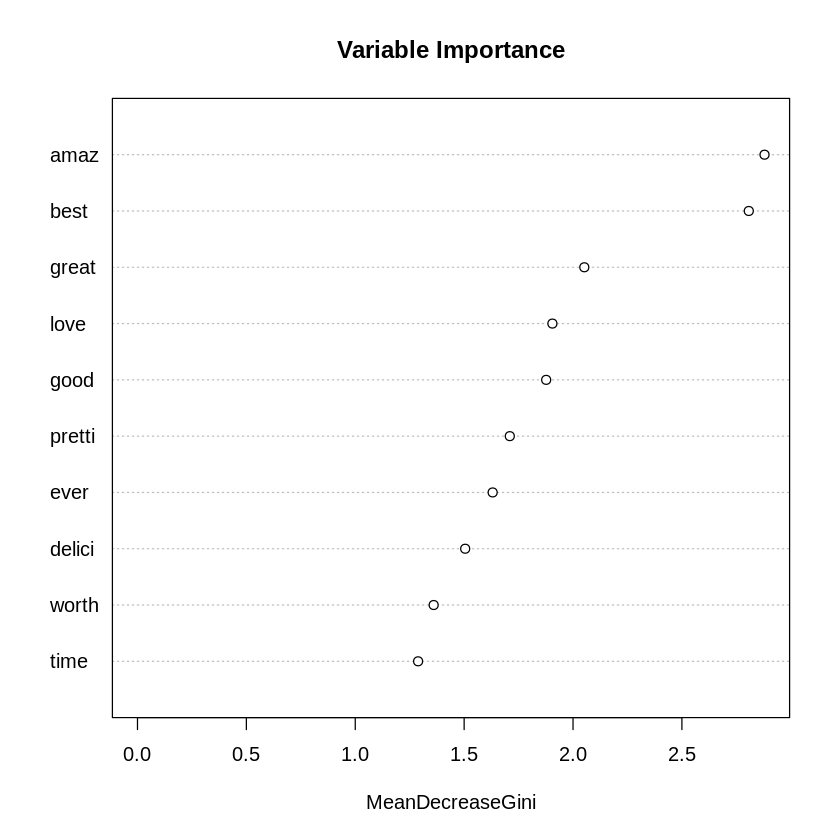

In [0]:
varImpPlot(rf.base, n.var = 10, main = "Variable Importance")


In [0]:
rf.base <- randomForest(x = train_x, y = train_y)

In [0]:
confusionMatrix(predict(rf.base, newdata = test_x), test_y)

Confusion Matrix and Statistics

          Reference
Prediction Negative Positive
  Negative       57       26
  Positive       10        7
                                          
               Accuracy : 0.64            
                 95% CI : (0.5379, 0.7336)
    No Information Rate : 0.67            
    P-Value [Acc > NIR] : 0.77323         
                                          
                  Kappa : 0.0717          
                                          
 Mcnemar's Test P-Value : 0.01242         
                                          
            Sensitivity : 0.8507          
            Specificity : 0.2121          
         Pos Pred Value : 0.6867          
         Neg Pred Value : 0.4118          
             Prevalence : 0.6700          
         Detection Rate : 0.5700          
   Detection Prevalence : 0.8300          
      Balanced Accuracy : 0.5314          
                                          
       'Positive' Class : Negative        


**(c) Using the fitted model, predict the sentiment values for the test set and report the confusion
matrix along with accuracy, precision, recall and F1 score.**

In [0]:
predicted_class_rf <- predict(rf.base, newdata = test_x)

In [0]:
cmat <- table(test_y, predicted_class_rf)
nb_acc <- sum(diag(cmat))/sum(cmat) # accuracy = (TP + TN) / (TP + FP + TN + FN)
nb_recall <- cmat[2,2]/sum(cmat[2,]) # recall = TP / (TP + FN)
nb_precision <- cmat[2,2]/sum(cmat[,2]) # precision = TP / (TP + FP)
nb_f1 <- 2*(nb_recall*nb_precision)/(nb_recall + nb_precision)

# print
cat(
  
  "Accuracy:",  nb_acc, "\n",
  "Recall:",  nb_recall, "\n",
  "Precision:",  nb_precision, "\n",
  "F1-score:", nb_f1
)

Accuracy: 0.64 
 Recall: 0.2121212 
 Precision: 0.4117647 
 F1-score: 0.28

**(d) Now you will do some tuning of one the two model parameters. The package’s default
value for the argument mtry is sqrt(#offeatures). Estimate two more models,
one for each of two different values of mtry: 0.5 ∗ sqrt(#offeatures) and 1.5 ∗
sqrt(#offeatures). As you did above, use each of the fitted models to predict the sentiment
values for the test set and report the respective accuracy scores. Which value of
mtry yielded the best accuracy?**

In [0]:
### Parameter tuning: Question 7/d:

trainControl <- trainControl(method = "cv", number = 5)
metric <- "Accuracy"
tunegrid <- expand.grid(.mtry = c(0.5*mtry, 1.5*mtry))  # at the moment caret only allows tuning of mtry (partly b/c ntree is just a matter of computational constratints)
set.seed(1984)


In [0]:
system.time(rf.grid <- train(x = train_x, y = train_y, method = "rf", metric = metric, tuneGrid = tunegrid, trControl = trainControl, 
                             ntree = ntree))
# print grid search results
print(rf.grid)



   user  system elapsed 
 12.514   0.007  12.527 

Random Forest 

400 samples
911 predictors
  2 classes: 'Negative', 'Positive' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 321, 319, 320, 320, 320 
Resampling results across tuning parameters:

  mtry      Accuracy   Kappa    
  15.09139  0.6826016  0.1831115
  45.27416  0.6773832  0.2389227

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 15.09139.
